In [1]:
# import requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import cv2
import random
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, Resizing
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import train_test_split
from PIL import Image
import csv
import random
import shutil
from keras.callbacks import EarlyStopping
from keras.regularizers import l2


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Capstone/


/content/drive/MyDrive/Capstone


In [5]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load images
data = datagen.flow_from_directory(
    'rotated_flipped_mvp',  # path to the parent directory
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'  # use 'binary' if you have two classes
)

Found 1356 images belonging to 8 classes.


In [9]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # reserve 20% of images for validation

# Use flow_from_directory to load training images
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Capstone/rotated_flipped_mvp_2/rotated_flipped_mvp',  # path to the parent directory
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # specify this is for training data
)

# Use flow_from_directory to load validation images
val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Capstone/rotated_flipped_mvp_2/rotated_flipped_mvp',  # path to the parent directory
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # specify this is for validation data
)


Found 16720 images belonging to 8 classes.
Found 4176 images belonging to 8 classes.


In [ ]:
# Define the architecture
#Must use MaxPooling alongside Conv2D in all models, train time even with the V100 GPU is beyond 12-hour limit. Aborted fitting.
#runtime limit.
model_conv2d_extreme_1 = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')
])

# Compile the model
model_conv2d_extreme_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# history object is called "model_1_history here. And model object is called "model_1"
model_conv2d_extreme_1_history = model_conv2d_extreme_1.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping],batch_size=128)


Epoch 1/30
313/523 [================>.............] - ETA: 44:47 - loss: 1.9217 - accuracy: 0.2147

In [ ]:
# Save the model
model_path = "/content/drive/MyDrive/Capstone/pickled_models/model_conv2d_extreme_1.h5"
model_conv2d_extreme_1.save(model_path)

# Save the history
import json
history_path = "/content/drive/MyDrive/Capstone/pickled_models/model_conv2d_extreme_1_history.json"
with open(history_path, 'w') as f:
    json.dump(model_conv2d_extreme_1_history.history, f)


In [ ]:
model_conv2d_extreme_1.get_weights()

In [41]:
# Define the architecture
model_1 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')
])


In [42]:
# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history object is called "model_1_history here. And model object is called "model_1"
model_1_history=model_1.fit(train_data, validation_data=val_data, epochs=30, batch_size=128)

Epoch 1/30
213/213 [==============================] - 36s 160ms/step - loss: 0.9248 - accuracy: 0.5987 - val_loss: 0.8252 - val_accuracy: 0.6519
Epoch 2/30
213/213 [==============================] - 33s 157ms/step - loss: 0.7076 - accuracy: 0.7015 - val_loss: 0.7227 - val_accuracy: 0.6761
Epoch 3/30
213/213 [==============================] - 35s 164ms/step - loss: 0.6074 - accuracy: 0.7455 - val_loss: 0.7493 - val_accuracy: 0.6655
Epoch 4/30
213/213 [==============================] - 38s 177ms/step - loss: 0.5412 - accuracy: 0.7693 - val_loss: 0.7045 - val_accuracy: 0.6938
Epoch 5/30
213/213 [==============================] - 33s 156ms/step - loss: 0.4706 - accuracy: 0.8041 - val_loss: 0.7245 - val_accuracy: 0.7186
Epoch 6/30
213/213 [==============================] - 34s 158ms/step - loss: 0.4640 - accuracy: 0.8122 - val_loss: 0.6971 - val_accuracy: 0.7209
Epoch 7/30
213/213 [==============================] - 34s 159ms/step - loss: 0.3719 - accuracy: 0.8503 - val_loss: 0.7406 - val_ac

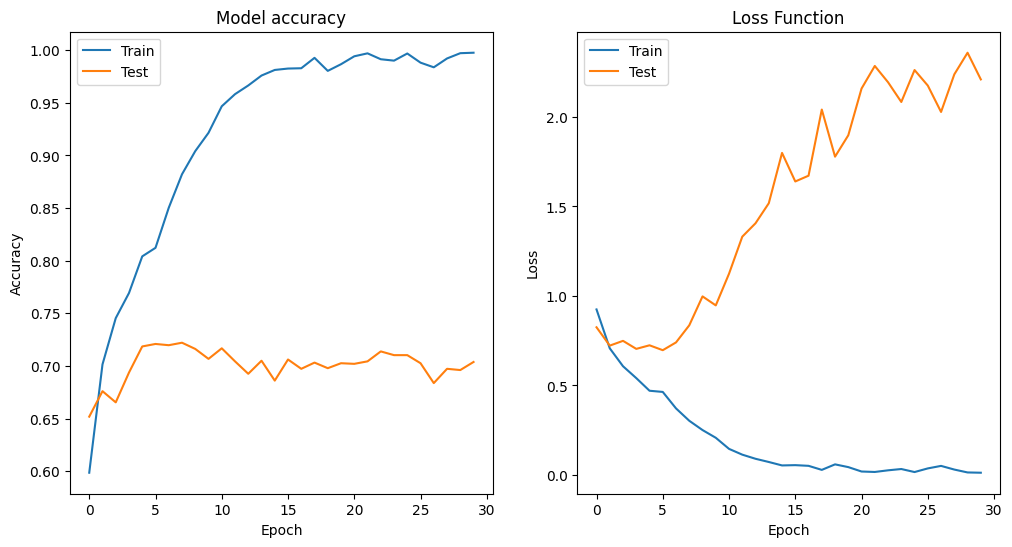

In [71]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_1_history.history['accuracy'])
axs[0].plot(model_1_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_1_history.history['loss'])
axs[1].plot(model_1_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [64]:
# Define the architecture
model_2 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(200, 200, 3), kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(8, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Fit your model with early stopping callback
model_2_history= model_2.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
213/213 [==============================] - 42s 191ms/step - loss: 1.4081 - accuracy: 0.5987 - val_loss: 1.1559 - val_accuracy: 0.6177
Epoch 2/30
213/213 [==============================] - 41s 192ms/step - loss: 1.0146 - accuracy: 0.6837 - val_loss: 1.0139 - val_accuracy: 0.6667
Epoch 3/30
213/213 [==============================] - 35s 166ms/step - loss: 0.9620 - accuracy: 0.6890 - val_loss: 0.9733 - val_accuracy: 0.6661
Epoch 4/30
213/213 [==============================] - 40s 189ms/step - loss: 0.9101 - accuracy: 0.7030 - val_loss: 0.9661 - val_accuracy: 0.6885
Epoch 5/30
213/213 [==============================] - 35s 166ms/step - loss: 0.8706 - accuracy: 0.7157 - val_loss: 1.0075 - val_accuracy: 0.6537
Epoch 6/30
213/213 [==============================] - 36s 168ms/step - loss: 0.8624 - accuracy: 0.7197 - val_loss: 0.9734 - val_accuracy: 0.6555
Epoch 7/30
213/213 [==============================] - 36s 170ms/step - loss: 0.8247 - accuracy: 0.7341 - val_loss: 0.8986 - val_ac

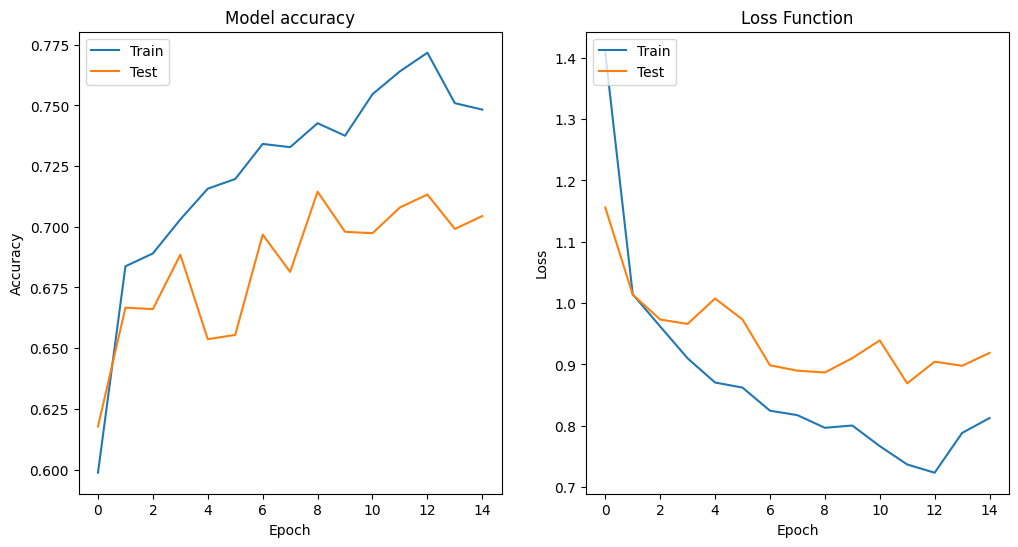

In [70]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_2_history.history['accuracy'])
axs[0].plot(model_2_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_2_history.history['loss'])
axs[1].plot(model_2_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [69]:
# Define the architecture
model_3 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(200, 200, 3), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

# Compile the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Fit your model with early stopping callback
model_3_history = model_3.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
213/213 [==============================] - 37s 164ms/step - loss: 1.8258 - accuracy: 0.4899 - val_loss: 1.8288 - val_accuracy: 0.5988
Epoch 2/30
213/213 [==============================] - 37s 174ms/step - loss: 1.2447 - accuracy: 0.5960 - val_loss: 1.7347 - val_accuracy: 0.6242
Epoch 3/30
213/213 [==============================] - 35s 163ms/step - loss: 1.1405 - accuracy: 0.6233 - val_loss: 1.4732 - val_accuracy: 0.6366
Epoch 4/30
213/213 [==============================] - 37s 172ms/step - loss: 1.0784 - accuracy: 0.6454 - val_loss: 1.4964 - val_accuracy: 0.6478
Epoch 5/30
213/213 [==============================] - 32s 149ms/step - loss: 1.0757 - accuracy: 0.6473 - val_loss: 1.4149 - val_accuracy: 0.6466
Epoch 6/30
213/213 [==============================] - 38s 177ms/step - loss: 1.0480 - accuracy: 0.6559 - val_loss: 1.3945 - val_accuracy: 0.6549
Epoch 7/30
213/213 [==============================] - 39s 183ms/step - loss: 1.0162 - accuracy: 0.6654 - val_loss: 1.3333 - val_ac

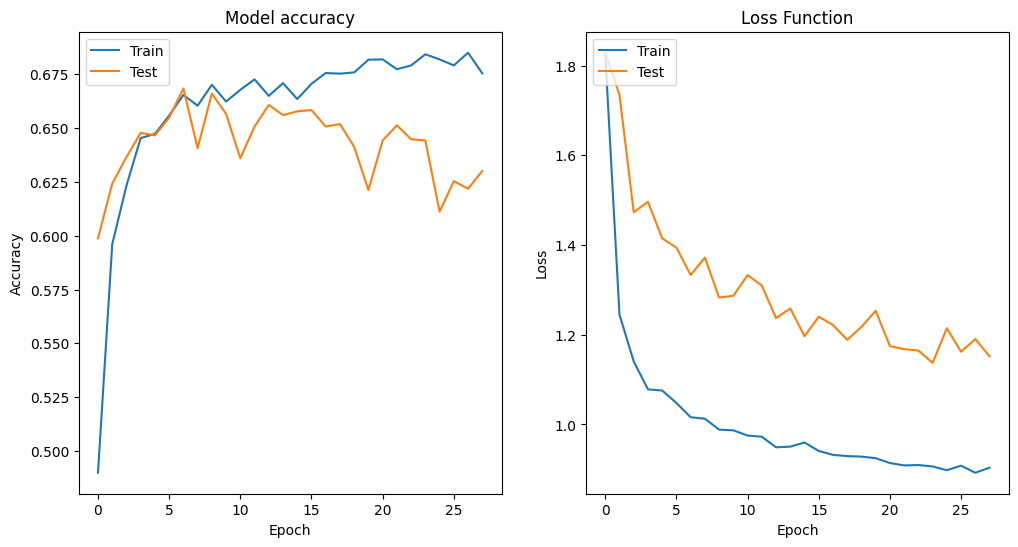

In [72]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_3_history.history['accuracy'])
axs[0].plot(model_3_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_3_history.history['loss'])
axs[1].plot(model_3_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()
